# Hypothesis Testing Exercise

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

    Has the network latency gone up since we switched internet service providers?
    
    Is the website redesign any good?
    
    Is our television ad driving more sales?


## Has the network latency gone up since we switched internet service providers?


Null Hypothesis: The new internet service provider has slower internet speeds than our previous provider


Alternative Hypothesis: The new internet service provider is as fast(or faster) than our previous provider


    True Positive: We compared the results of speed test to confirm that out new internet provider does in fact have slower interent speed

    True Negative: Comparing the results of speed test, we confirm that our new internet provider is in fact giving us faster internet speeds

    Type I Error: The new internet provider does provide faster speeds, however this is not percieved as the router we use has a defect.  This misleads us into believing the old service provider was faster

    Type II Error: The new internet service provider is percieved to be faster than our older service, when in fact our old service just needed an updated router to provide faster internet speeds


## Is the website redesign any good?


Null Hypothesis: The new web design will attract more traffic to the website than the previous design, confirming its quality.


Alternative Hypothesis: The new wed design does not attract as much traffic to the site, therefore the redesign was not successful.


    True Positive: Once the new design was up and running, we documented an instant increase in website traffic

    True Negative: Once the new design was up and running, we documented no noticable jump in website traffic and perhaps even a decrease in traffic

    Type I Error: An influx of bots designed to click thru newly designed sites leads us to percieve a successful launch of our new web design

    Type II Error: When we launched the new web design, an unrelated blackout prevented a larger part of our base to be unable to access it.  We percieve this as an unsuccessful redesign launch 


## Is our television ad driving more sales?


Null Hypothesis: There was an increase in sales after the airing of our television ad


Alternative Hypothesis: There was no noticable impact on sales after the airing of our television ad.


    True Positive: Our sales see a 20% increase after the airing of the ad

    True Negative: Our sales continue to stagnate after airing the ad.

    Type I Error: We had a particularly good week of sales following the ad, but purely due to chance.

    Type II Error: Our sales do not increase after airing the ad, but this is due to mistyped address and people just cant find your location


# T-testing Exercise 1



  Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [2]:
import numpy as np
import pandas as pd
import env
from scipy import stats
import matplotlib.pyplot as plt

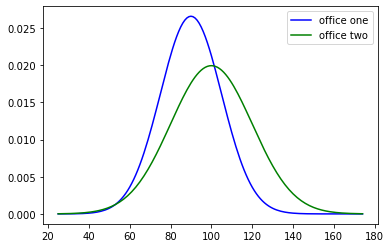

In [20]:

sample = 40 #sales
mean_one = 90 #days
std_dev_one = 15 #days


sample = 50 #sales
mean_two = 100
std_dev_two = 20 #days
α = .05

# Null Hypothesis
#  office_one avg time to sell = office_two avg time to sell

# Alt Hypothesis
#  office_one avg time to sell != office_two avg time to sell

x = np.arange(25, 175)

off_one = stats.norm(90, 15).pdf(x)
off_two = stats.norm(100, 20).pdf(x)

plt.plot(x, off_one, label='office one', color='b')
plt.plot(x, off_two, label='office two', color='g')

plt.legend()

In [23]:
off_one.var() == off_two.var()

False

In [36]:
# nope ----t, p = stats.ttest_ind(off_one, off_two)

t, p = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var= False)

t, p, α

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [39]:
if (p < α) == True:
    print('We can reject the null hypothesis, and conclude that the two offices sell homes at different rates.')

We can reject the null hypothesis, and conclude that the two offices sell homes at different rates.


# T-testing Exercise 2


 ### Load the mpg dataset and use it to answer the following questions:
    
        Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
        
        Are compact cars more fuel-efficient than the average car?
        
        Do manual cars get better gas mileage than automatic cars?


In [44]:
from pydataset import data

mpg = data('mpg')

mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


### Part 1
### Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [46]:
# Null Hypothesis
#  2008 fuel-efficiency = 1999 fuel_efficiency 

# Alt Hypothesis
#   2008 fuel-efficiency != 1999 fuel_efficiency 

mpg['fuel_efficiency'] = (mpg.cty + mpg.cty) / 2

fe_1999 = mpg[mpg.year == 1999].fuel_efficiency
fe_2008 = mpg[mpg.year == 2008].fuel_efficiency

<AxesSubplot:>

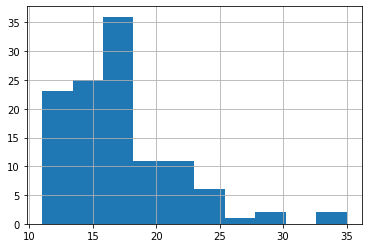

In [49]:
#  graph to help visualize distribution 

fe_1999.hist()

<AxesSubplot:>

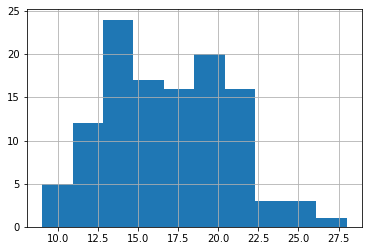

In [50]:
# graph to help visualize distribution 

fe_2008.hist()

In [52]:
fe_1999.var() == fe_2008.var()

False

In [54]:
t, p = stats.ttest_ind(fe_2008, fe_1999, equal_var=False)
t, p

(-0.5674988409997608, 0.5709289258613233)

In [56]:
if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

 Due to p being greater than α, the null hypothesis stands.


### Part 2
### Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

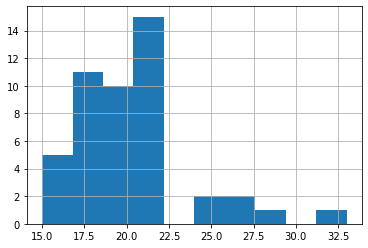

In [59]:
# Null Hypothesis
#  compact cars fuel-efficiency <= average car fuel-efficiency

# Alt Hypothesis
#  compact cars fuel-efficiency > average car fuel-efficiency

μ = mpg.fuel_efficiency.mean()

compact = mpg[mpg['class'] == 'compact'].fuel_efficiency

compact.hist()

In [60]:
t, p = stats.ttest_1samp(compact, μ)

t, p/2, α

(6.6191042534408915, 1.7008724108197003e-08, 0.05)

In [61]:
if p/2 < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

 We can reject he null hypothesis.


### Part 3

### Do manual cars get better gas mileage than automatic cars?

In [67]:
# Null Hypothesis
#  manual cars fuel_efficiency <= automatic cars fuel_efficiency

# Alt Hypothesis
#  manual cars fuel_efficiency <= automatic cars fuel_efficiency

fe_manual = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
fe_auto = mpg[mpg.trans.str.contains('auto')].fuel_efficiency

<AxesSubplot:>

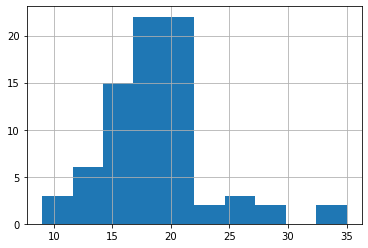

In [65]:
fe_manual.hist()

<AxesSubplot:>

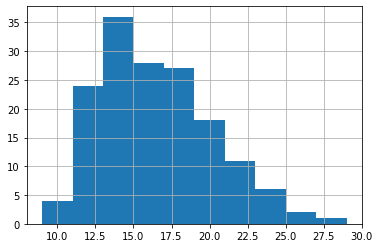

In [66]:
fe_auto.hist()

In [68]:
fe_auto.var() == fe_manual.var()

False

In [75]:
t, p = stats.ttest_ind(fe_auto, fe_manual, equal_var=False)

t, p, α

(-4.537543658735826, 1.2633643745317661e-05, 0.05)

In [74]:
if p < α:
    print(f' We can reject he null hypothesis.')
else:
    print(f' Due to p being greater than α, the null hypothesis stands.')

 We can reject he null hypothesis.


# Correlation Exercise 1.a


Use the telco_churn data. Does tenure correlate with monthly charges?

 Total charges? 

 What happens if you control for phone and internet service?

In [111]:
telco = pd.read_csv('telcom_dataset.csv')
telco = telco.dropna()

telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7038 entries, 11 to 7048
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7038 non-null   object 
 1   gender                  7038 non-null   object 
 2   is_senior_citizen       7038 non-null   int64  
 3   partner                 7038 non-null   object 
 4   dependents              7038 non-null   object 
 5   phone_service           7038 non-null   int64  
 6   phone_service_name      7038 non-null   object 
 7   internet_service        7038 non-null   int64  
 8   internet_service_name   7038 non-null   object 
 9   contract_type           7038 non-null   int64  
 10  contract_name           7038 non-null   object 
 11  payment_type            7038 non-null   object 
 12  monthly_charges         7038 non-null   float64
 13  total_charges           7038 non-null   float64
 14  tenure                  7038 non-null  

### Use the telco_churn data. Does tenure correlate with monthly charges?

In [85]:
# Null Hypothesis
#  tenure and monthly charges are not linearly correlated

# Alt Hypothesis
#  tenure and monthly charges are linearly correlated

x = telco.tenure_months
y = telco.monthly_charges

r, p = stats.pearsonr(x, y)

print(f'The p-value of {(p)} lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of {round(r, 4)}.')

The p-value of 1.0229574716021578e-98 lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of 0.2473.


# Correlation Exercise 1.b


### Use the telco_churn data. Does tenure correlate with total charges? 

In [113]:
# Null Hypothesis
#  tenure and total charges are not linearly correlated

# Alt Hypothesis
#  tenure and total charges are linearly correlated

x = telco.tenure_months
y = telco.total_charges

r, p = stats.pearsonr(x, y)

print(f'The p-value of {(p)} lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of {round(r, 4)}.')

The p-value of 0.0 lets us conlude we can ignore the null hypothesis, the alt hypothesis is supoorted with a correlation of 0.8259.


# Correlation Exercise 1.c


### What happens if you control for phone and internet service?

# Correlation Exercise 2.a

Use the employees database.

   ### Is there a relationship between how long an employee has been with the company and their salary?
